### Uber Pickups Analysis Quiz

The question set is based on the August dataset, `uber-raw-data-aug14.csv`.

#### Keeping the dataset ready before questions

In [143]:
import pandas as pd

df = pd.read_csv('uber-raw-data-aug14.csv')
df.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


#### Q1. On what date did we see the most number of Uber pickups?

**Skill Test:** Grouping & Counting

In [144]:
# Convert the 'Date/Time' column to datetime format

df['Date/Time'] = pd.to_datetime(df['Date/Time'], format="%m/%d/%Y %H:%M:%S")
# Group by date and count the number of pickups

df.groupby(df['Date/Time'].dt.date)['Date/Time'].count()

# Find the date with the highest number of pickups
df.groupby(df['Date/Time'].dt.date)['Date/Time'].count().idxmax()



datetime.date(2014, 8, 7)

#### Q.2 How many Uber pickups were made on the date with the highest number of pickups?

**Skill Test:** Indexing and filtering

In [158]:
# Filter the DataFrame to include only the rows for the date with the highest number of pickups
df[df['Date/Time'].dt.date == df.groupby(df['Date/Time'].dt.date).size().idxmax()]

# Get the count of pickups on the highest date
df.groupby(df['Date/Time'].dt.date)['Date/Time'].count().max()



32759

#### Q.3 How many unique TLC base companies are affiliated with the Uber pickups in the dataset?

**Skill Test:** Counting unique values

In [160]:
# Count the number of unique TLC base companies
df['Base'].nunique()


5

#### Q.4 Which TLC base company had the highest number of pickups?

**Skill Test:** Grouping, counting, and finding the maximum

In [162]:
# Group by TLC base company and count the number of pickups
df.groupby(df['Base'])['Date/Time'].count()

# Find the TLC base company with the highest number of pickups
df.groupby(df['Base'])['Date/Time'].size().idxmax()

'B02617'

#### Q.5 How many Uber pickups were made at each unique TLC base company?

**Skill Test:** Grouping and counting

In [148]:
# Group by TLC base company and count the number of pickups
df.groupby(df['Base'])['Date/Time'].size().sort_values(ascending=False)



Base
B02617    355803
B02598    220129
B02682    173280
B02764     48591
B02512     31472
Name: Date/Time, dtype: int64

#### Q.6 Can you determine the busiest time of day for Uber pickups based on the date/time column?

**Skill Test:** Extracting time components, grouping, counting, and finding the maximum

In [165]:
# Extract the hour from the 'Date/Time' column
df['Date/Time'].dt.hour

# Group by hour and count the number of pickups
df.groupby(df['Date/Time'].dt.hour)['Date/Time'].size()

# Find the hour with the highest number of pickups
df.groupby(df['Date/Time'].dt.hour)['Date/Time'].size().idxmax()



17

#### Q.7 Can you create a visualization (e.g., a bar chart or line plot) to represent the number of Uber pickups over time?

**Skill Test:** Data Visualization using Plotting function 

Text(0, 0.5, 'Number of Pickups')

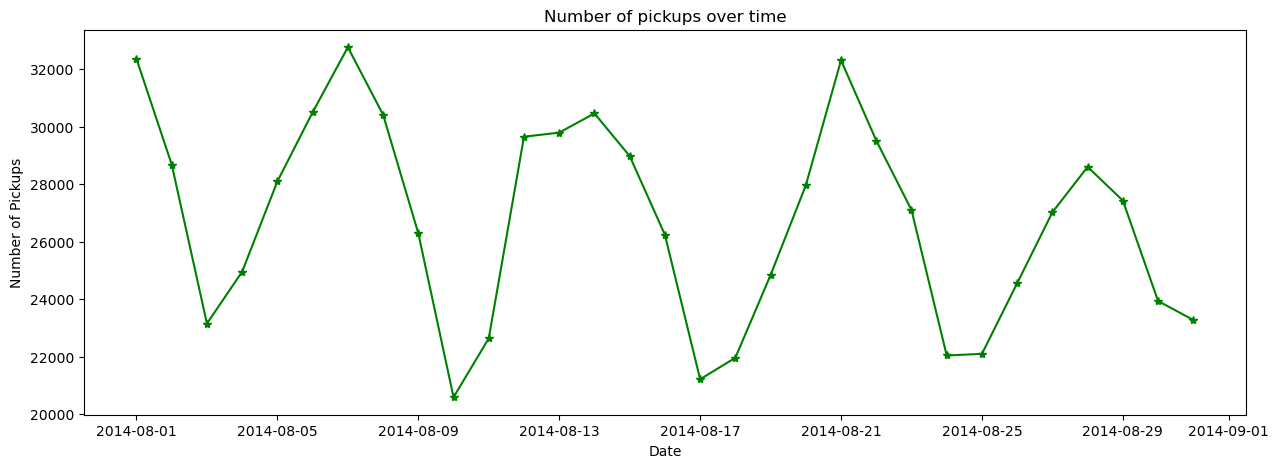

In [150]:
import matplotlib.pyplot as plt

# Group by date and count the number of pickups
df.groupby(df['Date/Time'].dt.date).size()

# Create a line plot to visualize the number of pickups over time
plt.figure(figsize=(15,5))
plt.plot(df.groupby(df['Date/Time'].dt.date).size(), marker='*', c='green')
plt.title("Number of pickups over time")
plt.xlabel("Date")
plt.ylabel("Number of Pickups")

#### Q8. Can you create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude?

**Skill Test:** Scatter Plot

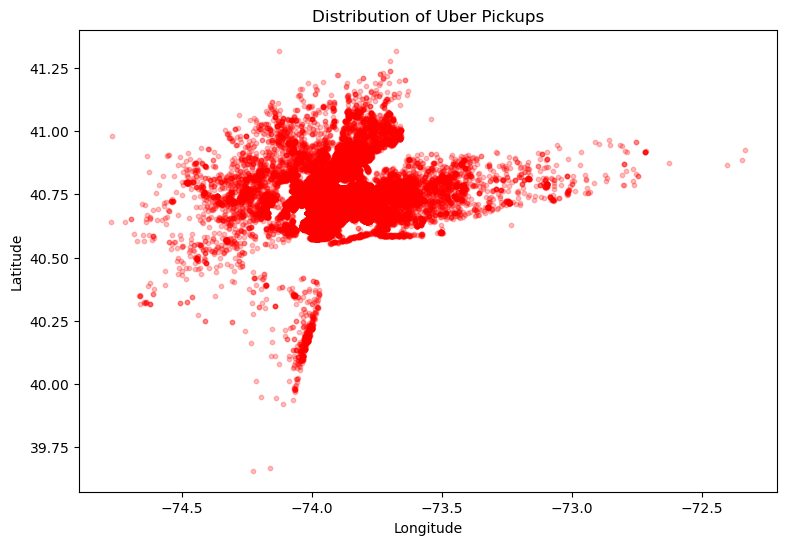

In [151]:
# Create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude
plt.figure(figsize=(9, 6))
plt.scatter(df['Lon'], df['Lat'], s=10, alpha= 0.25, c='red')
plt.title('Distribution of Uber Pickups')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

#### Q9. Can you create a bar chart to compare the number of Uber pickups for each TLC base company?

**Skill Test:** Bar Chart

Text(0, 0.5, 'Number of pickups')

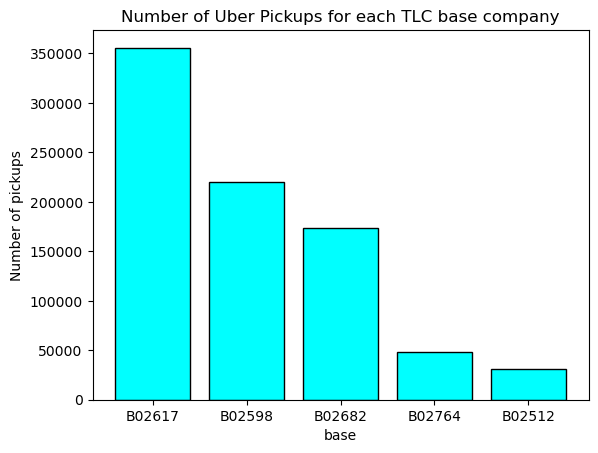

In [152]:
# Create a bar chart to compare the number of Uber pickups for each TLC base company
plt.bar(df.groupby(df['Base'])['Date/Time'].size().sort_values(ascending=False).index ,
        df.groupby(df['Base'])['Date/Time'].size().sort_values(ascending=False).values,
       color='cyan',
       edgecolor = 'black')
plt.title("Number of Uber Pickups for each TLC base company")
plt.xlabel("base")
plt.ylabel("Number of pickups")

#### Q10. Can you create a pie chart to display the percentage distribution of Uber pickups for each day of the week?

**Skill Test:** Pie Chart

Text(0.5, 1.0, 'Percentage distribution of Uber pickups')

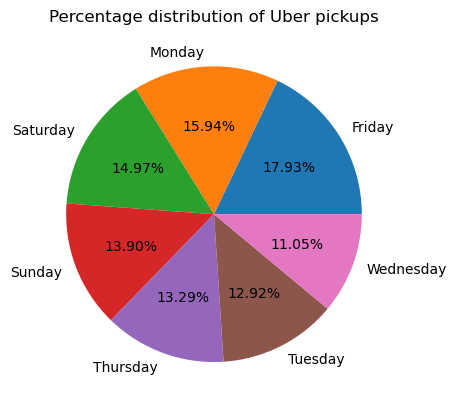

In [185]:
# Group by day of the week and count the number of pickups
df.groupby(df['Date/Time'].dt.day_name())['Date/Time'].count()
# Create a pie chart to display the percentage distribution of Uber pickups for each day of the week
plt.pie(df.groupby(df['Date/Time'].dt.day_name())['Date/Time'].count().sort_values(ascending=False), 
        labels = df.groupby(df['Date/Time'].dt.day_name())['Date/Time'].count().index,
       autopct='%0.2f%%')
plt.title("Percentage distribution of Uber pickups")